Project Report

**Introduction/Motivation**
\
After receiving a poor score on Milestone 1, I wanted to try a new dataset and change my approach. This dataset a set of trafficking cases globally. This dataset was extremely ambiguous and challenging. The ambiguity of this dataset made it daunting and required some creativity to devise a project to predict something but I really wanted to use the dataset because it is something I am passionate about and interested in. After examining this dataset I determined that I would want to attempt to see if I could attempt to predict the probabilitiy or chances of someone getting trafficked giving parameters about their profile.

**Milestone 1**
\
Data preprocessing definitely took the longest and was the most extensive process. I first changed all columnn names to make them more readable. Then I plotted some very basic relationships in the data as seen at the top of this notebook. Clear outliers in this dataset is that adult woman were trafficked far more often than men and minors.

Additionally the overwhelming increasing amount of those being registered over time. Whether it is due to the sample size, more registers are being caught due to factors like the internet, or other external factors. We can see that the combined amount of offenders from 2018-2022 is far exceeding the amount from 2014-2018 and especially 2005-2013 which is an even larger range of years.

Next I looked to address the null values. I wanted to display the most highly correlated missing values to see if I could feature engineer or remove any columns. However, the heat map showed that this dataset is actually mostly uncorrelated. Aside from status, many of the variables within the dataset are very loosely correlated & the relation to the perpertrator and if they paid for x service or not also revelaed some slight correlation.

However, the values related to status revealed that proportionally compared to the Adult group that Minors had for more misisng values. Minors on average recollected a lot less information than those were that of an adult. I then thought imputation methods might introduce bia, imputing these missing values with KNN, you're effectively ignoring the fact that missingness carries information (e.g., inability to recall is meaningful and potentially reflects an important aspect of the victim's experience).

The missing values are systematically different (e.g., minors’ missing perpetrator data reflect trauma that isn't captured in other features), the imputed values will not accurately represent reality. This same bias occurs to values of victims accounts from 2005-2013 ("legacy records") and there was a more standardized format of reporting these cases by 2012 to an online format.

Now its time to impute these values. I thought first to get rid of columns that were deemed unusable. I thought to use the top 3 columns that I could categorize the victims of these incidents were: gender, status, and the registration year of the incident(this played a heavy role into whether or not they were mostly filled out or not due to the 2005-2013 format). Those columns that did not contain 2/3 of these in each row were automatically disqualified and deleted. Then for missing values in the isModernSlavery column and isSexuallyExploited column, is that for any missing values in these columns were filled in with 0 aside from the fact if both of these columns were 0 then it would be omitted to -1. Then in rows where the 'isRecruiterOrBroker', 'isTransactionFacilitator', 'isControllerAbuserKidnapper' columns were not all empty, this would represent them being valued as 0 instead of -1 in the case where all 3 were missing values. I did this because if even one of the columns had a 1 value, then the person filling out the case took time to go to that section and mark the value as 1. Especially in the case of 'isExploiter, it is safe to assume it was left missing due to the nature of the question, if you were sexually exploited then the perpertrator is definitely an exploiter. Then for all remaining missing values in these columns I replaced them with -1 to preserve the nature/relationship of misisng values. I think considered that this was enough data in the binary columns(float) for me to perform KNN on the categorical columns so those missing values could be filled in as well. After that I hot encoded all columns to make it easier for the modeling algorithms to digest and featured engineered columns 'isForeigner' and 'knew perp'. I will show some graphs below that represent the dat of isModernSlavery and isSexuallyExploited across different countries below.

**Milestone 2**
\
To then build a model I had to approach this in a creative way I truly didn't have any labeled data. All the data I were sex trafficking cases. It wasn't like I could calcualte some probability or something like that from trafficked/total cases. So I first though to use a clustering model to determine what groups belonged with which and how many total groups there should be. As observed by the graph, the elbow test displayed that 6 is the most optimal amount of clusters to have for this data set. I put the encoded dataset into a Agglomerative Clustering and fit is with a distance matrix. Afterwards I visualized the clusters on a 2d plane hence why all clusters may not be shown and some are overlapping. After which I put onto the original df to view which cases belong to which clusters and how many cases are in each cluster. The most dense and populated cluster being cluster 2. Afterwards, I wanted to use a regression model because I wanted to predict probability which is numeric. Because of the high amount of columns caused by hot encoding the data, I thought to use Random Forest Regression since they are better at handling more variables in a regression model. I then created X and Y, X being the encoded df and y being our probability of being trafficked labeled as 'Risk Score'. This was calcuated as the amount of cases/nodes in a cluster out of all total cases.

I was highly satisfied with the results of my model prediction as the metrics indicate it is highly accurate and predictive. The metrics calcuated are:
Test MSE: 0.00035513912867446494

*   Test MSE: 0.0010110407872825932
*   RMSE: 0.03179686757029052
*   R-squared (R2): 0.9586388665805246
*   Mean Absolute Error (MAE): 0.007696914802500587

A low MSE shows that the predictions are very close to the actual values on your test data and the model is performing extremely well.RMSE indicates that, on average, your model's predictions deviate from the true values by approximately 0.0188 in the target variable's scale which again is highly accurate. At this point overfitting was a concern but given the difference in test and train mse it indicated that it was generalizing well and NOT overfitting. My R Squared score means the model explains 99% of the variance in the target variable, which is excellent and is complimented by my low MAE score. I then visualized some of the metrics of my model plotting a residual plot, actual vs predicted values plot, and feature importance plot.

The residuals appear somewhat scattered, but there are clear patterns. Residuals are concentrated closer to y=0 which is a good sign, but some residuals show clusters and trends, particularly for predicted values near 0.3 and 0.5. The residual spread increases with higher predicted values, suggesting variance of residuals changes as predictions increase. This suggest that my model may have some nonlinearity that cannot be captured by the model and I somewhat expected this given the amount of variable(columns) I have in my dataset from the hot encoding. This is very similar and even supported by the acutal vs predicted plot as many values are closer to 0 the deviations indicate that predictions seem to perform poorly for small actual values & the model might be biased toward predicting values around the .3 and .5 Risk Score range due to the vast amount of clustering in these regions. Again suggesting the model might not fully capture the relationships in the data for smaller actual values which is something I may improve on in the future. Based on the feature importance graph it may appear to over rely on the feature isSexuallyExploited 0.0. However, this simply means it relies on the feature of isModernSlavery (Forced Labor) being 0 which makes sense as this was MOST of the cases in our data set. Additionally relying on the is______ columns being empty which also makes sense due to the format of the 2005-2013 forms and there being so many cases for these as well.

To conclude, going into milestone 3 I am looking to fix errors in the performance of my model such as it not being able to capture the relationship of data for small values given the multidimensionality of the data it appears and look into ways of deploying this because I do deem this as extremely valuable information and powerful research that may actually help someone. However, I am extremely happy and satisfied with the current evaluation of my model as well as the time it took to preprocess deeded itself very valuable looking at my model performance.

**Milestone 3**


*Final Model Performance Analysis*

When comparing my model performance to other models, I wanted to give an example of all types of models. Hence why I used a regression model, clustering model, and deep learning model. For the alternative regression model I used a Gradient Boosting Regressor because they are excellent for handling structured/tabular data. However, this model was outperformed by the Random Forest Regressor which is evident by the performance metrics as the MSE is higher and the R^2 Value is lower. Additonally, using Kmeoids for clustering, when comparing it to my Agglomerative Clustering model the sihloutte score is nearly cut in half after using the same amount of clusters that was predicted to be the most optimal by using the Elbow Method. Finally after comparing the Deep Learning model it was additionally evident that my Random Forest model was better because despite it was far better than the Gradient Model and the R^2 Value is actually comprable, however the MSE is still higher than what the Random Forest model was able to predict. In conlusion if looking for simplicity & speed I would suggest going for a Gradient Boosting algorithm but given the nature of this data I want our predictive model to be as accurate as possible.

After viewing SHAP Values & Lime metrics to give us more insight on our model and how its inner workings can be interpreted it allowed us to see a couple things. isSexuallyExploited_0.0 strongly affects predictions, meaning whether someone is sexually exploited or is used for forced labor, itsignificantly impacts the models output. Features like victimRegionOfOrigin_Africa have a lower influence compared to the top-ranked features. This is backed by our LIME explanation peformance as the model heavily relies on isControllerAbuserKidnapper_0.0 and isSexuallyExploited_0.0 for making this prediction, while columns that rely on geographical location their impact is negliable to say the least. The images for both the SHAP & LIME Interpretations are above.

*Deployment Plan*


*   Model
  *  Random Forest Classifier. In mock deployment this model needs to be serialized using joblib or pickle for deployment
  *   For mock deployment we would export it to a .pkl file using using joblib.dump for our model
*   Data Pipeline
  *   The CTDC CSV should be stored and that is how data collection should occur. We would use the same preprocessing steps such as renaming columns, feature extraction, and imputation of missing values need to be included in our deployed environment. Since the CSV data is static and not derived from an API, the data pipeline focuses on ensuring the preprocessing occurs consistently when predictions are made.
*   Monitoring Systems
  *   To monitor our model we want to ensure that our models predictive power does not get worse. We want to constantly measure our model and if any metrics get below these values:
      *   Test MSE: 0.0010110407872825932
      *   RMSE: 0.03179686757029052
      *   R-squared (R2): 0.9586388665805246
      *   Mean Absolute Error (MAE): 0.007696914802500587
  *   Retraining will occur biannually or based on drift detection in the input data or model performance
  *   If monitoring detects a significant drop in performance metrics, the data pipeline and model will be reviewed, and retraining will be prioritized.
*   Retraining processes would include reassesing the dataset for any new biases or shifts in data distribution.
*   User Interface
  *   To create a user interface for this API instead of creating a website or application we could create an API endpoint (e.g., using Flask or FastAPI) for real-time predictions

In mock deployment we would export our model to a .pkl file using joblib.dump(). We would then serve predictions using Flask. We can store our database in some sort of SQL/AWS server. Then use flask request to obtain our preprocessed & encoded dataframe that would all occur essentially behind the scenes due to the static nature of the data. It is not being pulled from an API so it can be done on the backend. We can use joblib.load() to load our model from a .pkl file. Then use model.predict() to conduct predicitons on this data & our API would return these Risk Score Predictions.

*Ethical Considerations*

In terms of scaling this API it could be deployed as previously stated on a cloud platform like AWS, GCP, or Azure. We would then use Docker to containerize the application. For maintence we would want to implement version control & automate the retraining of this model if we upload/find updated data. However, if the performance metrics dip below an existing model we would have go in and update and reevaluate our data preprocessing and modeling choice. To make sure we are in compliance with legal regulations we would ensure data privacy via GDPR compliance & encrypt sensitive data during transmission to prevent unauthorized access or data breache. For further security  we want to secure communication by using HTTPS for all API endpoints. We would require user authentication and authorization to control access to the API, especially if sensitive data is being processed. Maintaining a schedule to update dependencies would minimize vulnerabilities


Given the nature of this data set ethical consideration plays a huge factor into the deployment and usage of this model. Data as sensistive as sex trafficking data should be dealt with very delicately. It was extremely important throughout the data preprocess to not reinforce any biases. I first did this by getting rid of rows with a significant amount of missing data & afterwards in the impuatation process, missing data was replaced with a -1. That way the data could still be represented as missing, especially when hot encoding the data. Finally, I then got rid of columns with -1 created from Hot Encoding as the lack of a column with properly represent that data as missing & not interfere with any modeling or using missing data as a parameter to apply weights to. In terms of feature representation, most bias aligns with the fact that this data comes from the Eastern side of the globe as no North or South American countries are represented. This is bias within the dataset that cannot be corrected but should be heavily considered that potential cultural and regional biases do exist within the data.

Additionally this type of data affects victims and law enforcement alike. The deployment of this technology would have to be used very carefully as the model is not 100% considering its metrics and training data. The amount of false positives may not be a problem as in theory it is better to assess someone to be at risk and to be mindful/careful in that region rather than not. However, the amount of false negatives might inaccurately access people are susceptible and are at risk. Leavely them to be careless and potentially make them victims. Stakeholders might want to raise concern to this training bias & the models predictive power. If stakeholders were to apply the model to North or South America might result in inaccurate predictions because these patterns may not generalize the trafficking patterns, behaviors, and demographics of citizens in these countries.

To ensure fairness and accountability, if stakeholders were still invested in our model but wanted to apply it to the Americas we would ask to validate the model against local data and, if possible, retrain it using region-specific datasets. To be as fair as possible to all regions we would introduce regional weightings in predictions to account for underrepresented regions and develop separate models tailored to specific regions if given this regional data.

This model is intended to serve as a supportive tool for identifying individuals who may be at risk, rather than providing definitive conclusions about who is or is not at risk. As a predictive model, its outputs are based on patterns in the data and should be interpreted in conjunction with expert judgment and additional contextual information. Given the inherent limitations in accuracy and the complexity of the factors involved, the model's predictions should not be considered absolute or used as the sole determinant in decision-making processes


##Imports and Obtaining Basic Info on Dataset
All explainations are in project report located the bottom of this notebook.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import kagglehub

In [ ]:
df = pd.read_csv('/content/CTDC_VPsynthetic_condensed.csv')
df.head(5)

,yearRegister,gender,majorityStatus,isForcedLabour,isSexualExploit,UN_COO_Region,UN_COE_Region,IP_Exploiter,IP_Gender,IP_ageBroad,IP_citizen_UNRegion,IP_Relation,IP_PayMoney,IP_RecruiterBroker,IP_TransactionProcess,IP_ControlAbuseKidnap
0,NaN,Female,Adult,1.0,NaN,Europe,Europe,1.0,Female;Male,NaN,Europe,StrangerUnknownOther,No;Yes,1.0,1.0,1.0
1,NaN,Female,Adult,1.0,NaN,Europe,Europe,1.0,Female;Male,NaN,Europe,StrangerUnknownOther,No;Yes,1.0,1.0,1.0
2,NaN,Female,Adult,1.0,NaN,Europe,Europe,1.0,Female;Male,NaN,Europe,StrangerUnknownOther,No;Yes,1.0,1.0,1.0
3,NaN,Female,Adult,1.0,NaN,Europe,Europe,1.0,Female;Male,NaN,Europe,StrangerUnknownOther,No;Yes,1.0,1.0,1.0
4,NaN,Female,Adult,1.0,NaN,Europe,Europe,1.0,Female;Male,NaN,Europe,StrangerUnknownOther,No;Yes,1.0,1.0,1.0


In [ ]:
new_column_names = {
    'yearRegister': 'registrationYear',
    'gender': 'victimGender',
    'majorityStatus': 'victimMajorityStatus',
    'isForcedLabour': 'isModernSlavery',
    'isSexualExploit': 'isSexuallyExploited',
    'UN_COO_Region': 'victimRegionOfOrigin',
    'UN_COE_Region': 'victimRegionOfExploitation',
    'IP_RecruiterBroker': 'isRecruiterOrBroker',
    'IP_TransactionProcess': 'isTransactionFacilitator',
    'IP_ControlAbuseKidnap': 'isControllerAbuserKidnapper',
    'IP_Exploiter': 'isExploiter',
    'IP_Relation': 'relationToPerpetrator',
    'IP_Gender': 'perpetratorGender',
    'IP_ageBroad': 'perpetratorAgeRange',
    'IP_citizen_UNRegion': 'perpetratorRegionOfCitizenship',
    'IP_PayMoney': 'didVictimPayMoney'
}
# Rename Columns for easier interpretation
df.rename(columns=new_column_names, inplace=True)
df['registrationYear'] = df['registrationYear'].replace(['2019', '2020', '2021-2022'], '2019-2022')

##Visualize some existing relationships

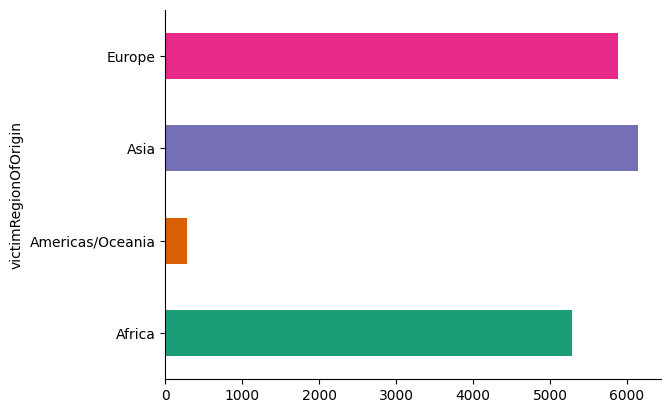

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('victimRegionOfOrigin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

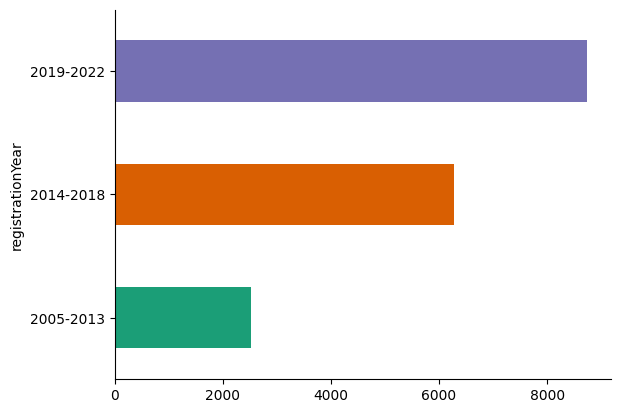

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('registrationYear').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

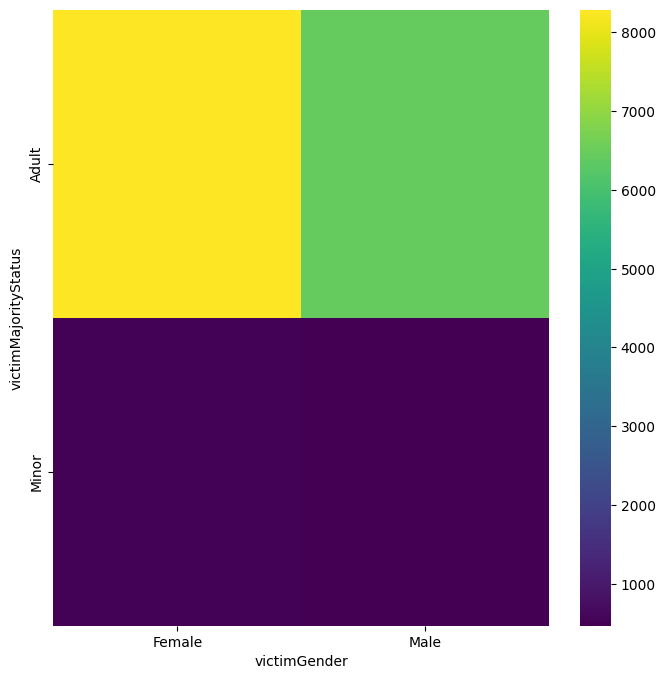

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['victimMajorityStatus'].value_counts()
    for x_label, grp in df.groupby('victimGender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('victimGender')
_ = plt.ylabel('victimMajorityStatus')

registrationYear                   3655
victimGender                       3611
victimMajorityStatus               3604
isModernSlavery                    8947
isSexuallyExploited               18420
victimRegionOfOrigin               3610
victimRegionOfExploitation         3999
isExploiter                       11737
perpetratorGender                  5408
perpetratorAgeRange               17993
perpetratorRegionOfCitizenship     6946
relationToPerpetrator              6623
didVictimPayMoney                  6040
isRecruiterOrBroker                9330
isTransactionFacilitator          13851
isControllerAbuserKidnapper       19117
dtype: int64


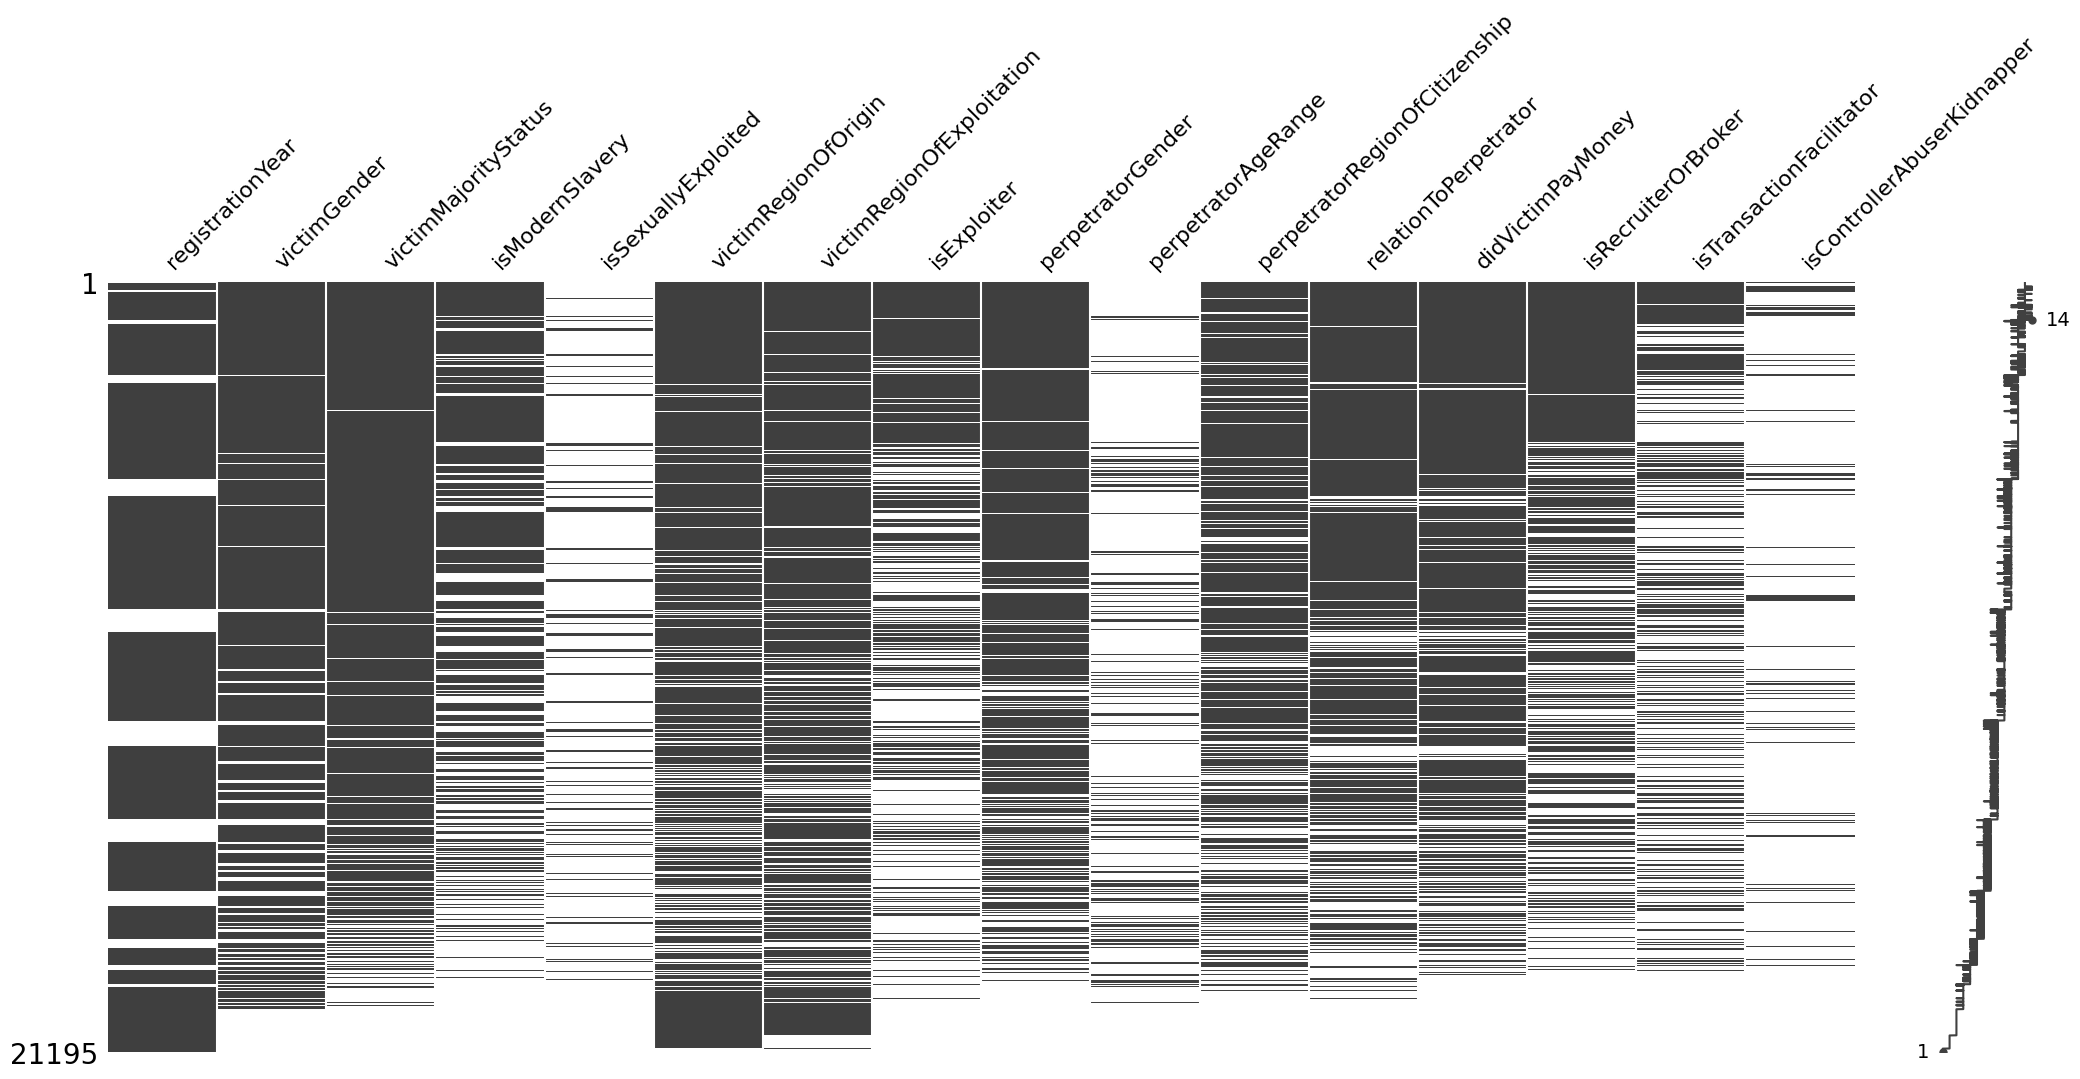

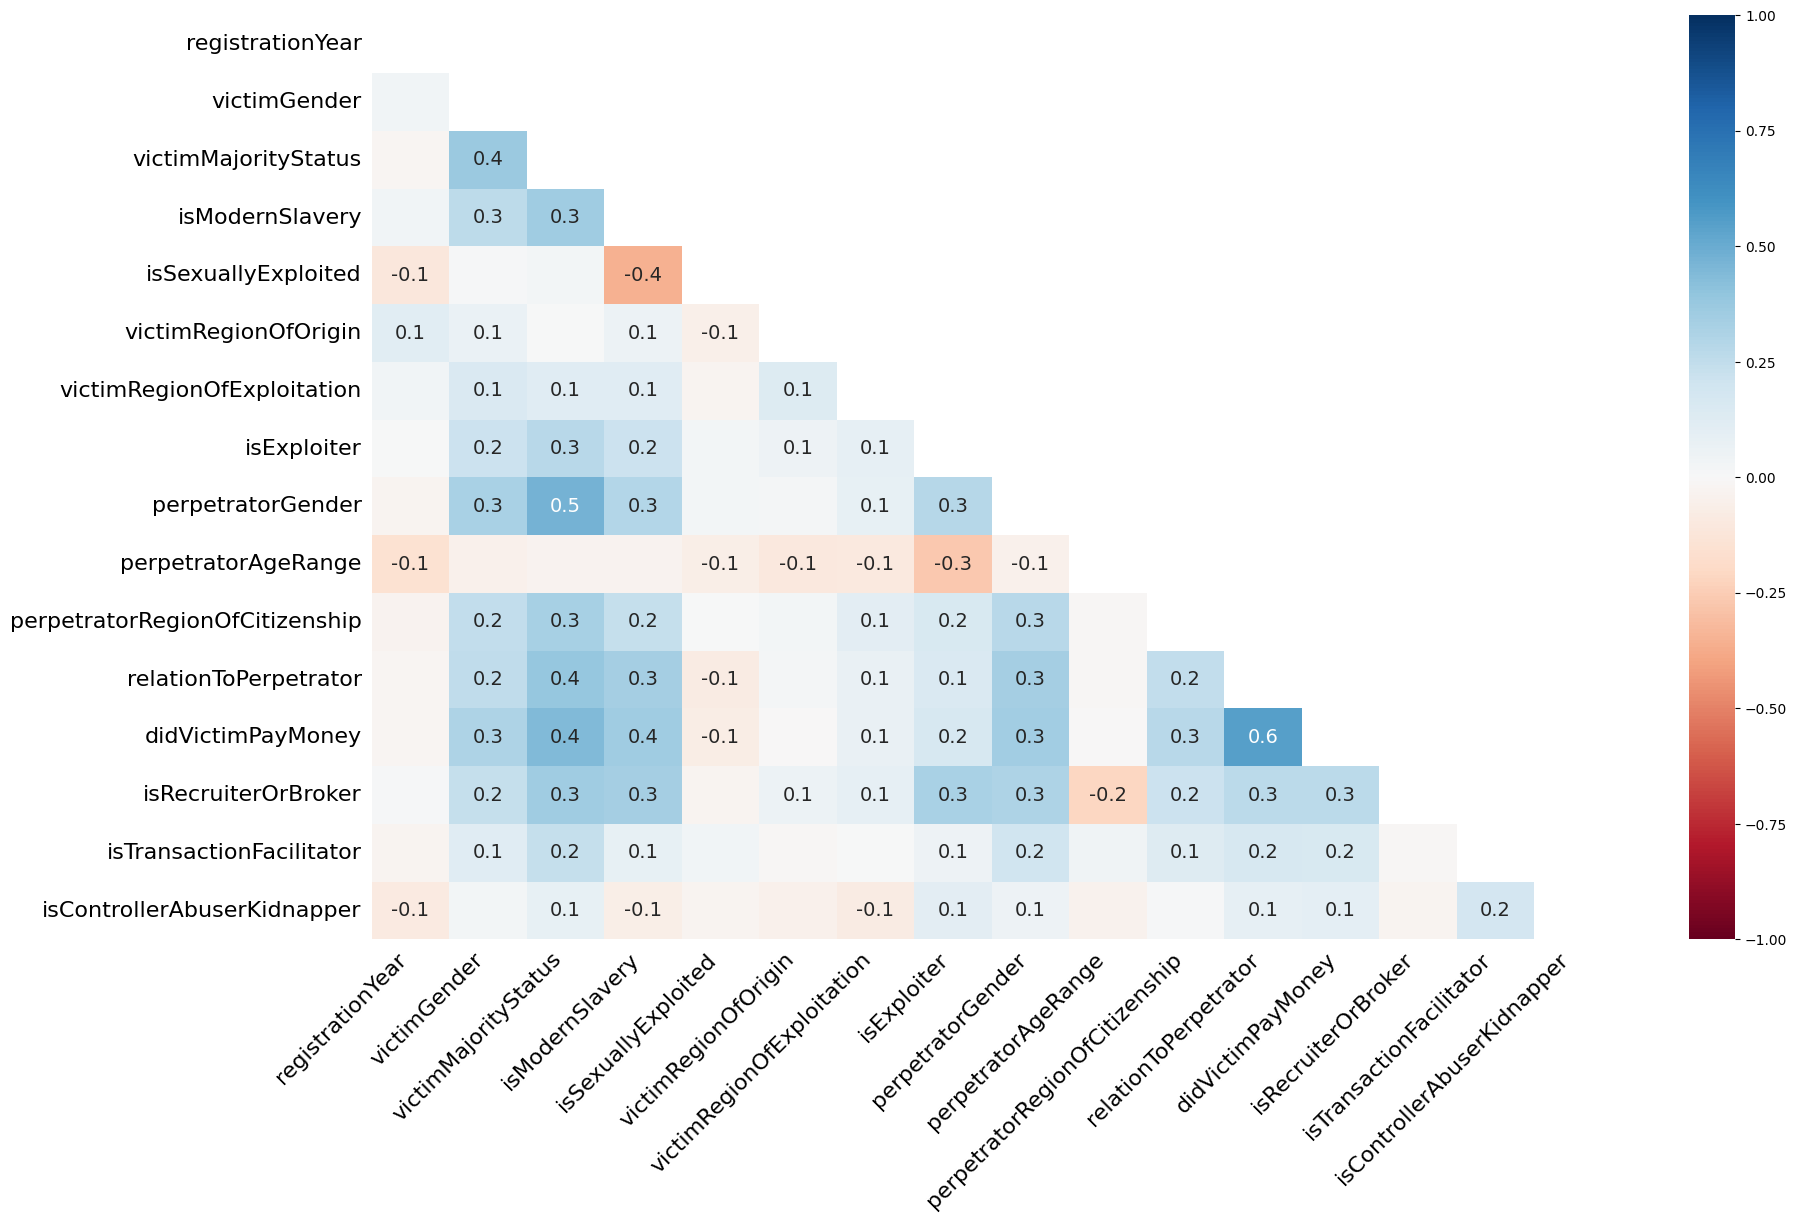

In [ ]:
import missingno as msno
print(df.isnull().sum())
msno.matrix(df)
plt.show()

# Visualize correlations in missing data
msno.heatmap(df)
plt.show()

# Analysis of relationship between status and other factors for missing values

In [ ]:
df.drop(columns=['perpetratorAgeRange'], inplace=True) #too many values to impute
print(df.isnull().sum())


missing_by_status = df.groupby('victimMajorityStatus').apply(lambda group: group.isnull().sum())

# Normalize to get the proportion of missing values for each status
total_rows_by_status = df.groupby('victimMajorityStatus').size()
proportion_missing = missing_by_status.div(total_rows_by_status, axis=0)

print("\nProportion of Missing Values by Status:")
print(proportion_missing)



missing_by_status = df.groupby('registrationYear').apply(lambda group: group.isnull().sum())

# Normalize to get the proportion of missing values for each status
total_rows_by_status = df.groupby('registrationYear').size()
proportion_missing = missing_by_status.div(total_rows_by_status, axis=0)

print("\nProportion of Missing Values by Status:")
print(proportion_missing)

registrationYear                   3655
victimGender                       3611
victimMajorityStatus               3604
isModernSlavery                    8947
isSexuallyExploited               18420
victimRegionOfOrigin               3610
victimRegionOfExploitation         3999
isExploiter                       11737
perpetratorGender                  5408
perpetratorRegionOfCitizenship     6946
relationToPerpetrator              6623
didVictimPayMoney                  6040
isRecruiterOrBroker                9330
isTransactionFacilitator          13851
isControllerAbuserKidnapper       19117
dtype: int64

Proportion of Missing Values by Status:
                      registrationYear  victimGender  victimMajorityStatus  \
victimMajorityStatus                                                         
Adult                         0.168570      0.100189                   0.0   
Minor                         0.274752      0.193069                   0.0   

                      isModernSla

<ipython-input-273-4c1fa157d457>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_status = df.groupby('victimMajorityStatus').apply(lambda group: group.isnull().sum())
<ipython-input-273-4c1fa157d457>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_status = df.groupby('registrationYear').apply(lambda group: group.isnull().sum())


#Imputation and Handling Null Values

In [ ]:
key_columns = ['registrationYear', 'victimGender', 'victimMajorityStatus']

# Count non-missing values across key columns for each row
df['non_missing_key_columns'] = df[key_columns].notna().sum(axis=1)

# Keep rows with at least 2 non-missing key columns
df = df[df['non_missing_key_columns'] >= 2]

# Drop the helper column
df = df.drop(columns=['non_missing_key_columns'])

print(df.isnull().sum())

registrationYear                   2530
victimGender                       1311
victimMajorityStatus               1477
isModernSlavery                    6857
isSexuallyExploited               16058
victimRegionOfOrigin               3030
victimRegionOfExploitation         3096
isExploiter                        9531
perpetratorGender                  3635
perpetratorRegionOfCitizenship     5216
relationToPerpetrator              4891
didVictimPayMoney                  4237
isRecruiterOrBroker                7279
isTransactionFacilitator          11553
isControllerAbuserKidnapper       16618
dtype: int64


In [ ]:
df.loc[df['isModernSlavery'].isnull() & df['isSexuallyExploited'] == 1, 'isModernSlavery'] = 0
df.loc[df['isSexuallyExploited'].isnull() & df['isModernSlavery'] == 1, 'isSexuallyExploited'] = 0
df.loc[df['isExploiter'].isnull() & df['isSexuallyExploited'] == 1, 'isExploiter'] = 0

columns_to_update = ['isRecruiterOrBroker', 'isTransactionFacilitator', 'isControllerAbuserKidnapper']
rows_to_update = ~(df['isRecruiterOrBroker'].isnull() & df['isTransactionFacilitator'].isnull() & df['isControllerAbuserKidnapper'].isnull())
df.loc[rows_to_update, columns_to_update] = df.loc[rows_to_update, columns_to_update].fillna(0)

columns_to_update = ['isExploiter']
df.loc[rows_to_update, columns_to_update] = df.loc[rows_to_update, columns_to_update].fillna(0)

columns_to_update = ['isRecruiterOrBroker', 'isTransactionFacilitator', 'isControllerAbuserKidnapper', 'isExploiter', 'isModernSlavery', 'isSexuallyExploited']
df[columns_to_update] = df[columns_to_update].fillna(-1)
df = pd.get_dummies(df, columns=columns_to_update, prefix=columns_to_update)


## KNN MODEL

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Drop the first row as it contains column names without headers
data = df.iloc[1:].reset_index(drop=True)

# Identify categorical columns (non-numeric data)
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical columns into numeric values for KNN
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Convert all columns to numeric for KNN Imputer
data = data.apply(pd.to_numeric, errors='coerce')

# Initialize and apply the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputed_data = knn_imputer.fit_transform(data)

# Convert back to DataFrame
imputed_data_df = pd.DataFrame(imputed_data, columns=data.columns)

# Decode the categorical columns back to original labels
for col, le in label_encoders.items():
    imputed_data_df[col] = le.inverse_transform(imputed_data_df[col].round().astype(int))

# Save the processed dataset
df = imputed_data_df

df = df.drop(columns=['registrationYear'])
df.replace('nan', 'Unknown', inplace=True)
print(df.isnull().sum())

victimGender                        0
victimMajorityStatus                0
victimRegionOfOrigin                0
victimRegionOfExploitation          0
perpetratorGender                   0
perpetratorRegionOfCitizenship      0
relationToPerpetrator               0
didVictimPayMoney                   0
isRecruiterOrBroker_-1.0            0
isRecruiterOrBroker_0.0             0
isRecruiterOrBroker_1.0             0
isTransactionFacilitator_-1.0       0
isTransactionFacilitator_0.0        0
isTransactionFacilitator_1.0        0
isControllerAbuserKidnapper_-1.0    0
isControllerAbuserKidnapper_0.0     0
isControllerAbuserKidnapper_1.0     0
isExploiter_-1.0                    0
isExploiter_0.0                     0
isExploiter_1.0                     0
isModernSlavery_-1.0                0
isModernSlavery_0.0                 0
isModernSlavery_1.0                 0
isSexuallyExploited_-1.0            0
isSexuallyExploited_0.0             0
isSexuallyExploited_1.0             0
dtype: int64

After determining there are no missing values left. I went on to hot encode and determine the amount of clusters that would best suit a clustering model
#Hot Encoding

In [ ]:
df['victimMajorityStatus'] = df['victimMajorityStatus'].replace({'Minor': 0, 'Adult': 1})
df['victimGender'] = df['victimGender'].replace({'Male': 1,'Female': 0})
df['perpetratorGender'] = df['perpetratorGender'].replace({'Male': 1, 'Female': 0,'Female;Male': -1})
df['didVictimPayMoney'] = df['didVictimPayMoney'].replace({'Yes': 1, 'No': 0,'No;Yes': -1})
columns_to_update = ['victimMajorityStatus', 'victimGender', 'perpetratorGender', 'didVictimPayMoney']
df[columns_to_update] = df[columns_to_update].fillna(-1)
df = pd.get_dummies(df, columns=columns_to_update, prefix=columns_to_update)

df['knewPerp'] = np.where(df['relationToPerpetrator'] != 'StrangerUnknown',1,0)
df.drop(columns=['relationToPerpetrator'], inplace=True)

columns_to_update = ['victimRegionOfOrigin', 'victimRegionOfExploitation','perpetratorRegionOfCitizenship']
df['isForeigner'] = np.where(df['victimRegionOfExploitation'] != df['victimRegionOfOrigin'], 1, 0)

df[columns_to_update] = df[columns_to_update].fillna(-1)
df = pd.get_dummies(df, columns=columns_to_update, prefix=columns_to_update)

In [ ]:
columns_to_drop = [col for col in df.columns if '-1' in col or 'Unknown' in col]
df = df.drop(columns=columns_to_drop)
df_encoded = df.astype(int)
print(df.columns)

Index(['isRecruiterOrBroker_0.0', 'isRecruiterOrBroker_1.0',
       'isTransactionFacilitator_0.0', 'isTransactionFacilitator_1.0',
       'isControllerAbuserKidnapper_0.0', 'isControllerAbuserKidnapper_1.0',
       'isExploiter_0.0', 'isExploiter_1.0', 'isModernSlavery_0.0',
       'isModernSlavery_1.0', 'isSexuallyExploited_0.0',
       'isSexuallyExploited_1.0', 'victimMajorityStatus_0',
       'victimMajorityStatus_1', 'victimGender_0', 'victimGender_1',
       'perpetratorGender_0', 'perpetratorGender_1', 'didVictimPayMoney_0',
       'didVictimPayMoney_1', 'knewPerp', 'isForeigner',
       'victimRegionOfOrigin_Africa', 'victimRegionOfOrigin_Americas/Oceania',
       'victimRegionOfOrigin_Asia', 'victimRegionOfOrigin_Europe',
       'victimRegionOfExploitation_Africa',
       'victimRegionOfExploitation_Americas/Oceania',
       'victimRegionOfExploitation_Asia', 'victimRegionOfExploitation_Europe',
       'perpetratorRegionOfCitizenship_Africa',
       'perpetratorRegionOfCitize

In [ ]:
df_encoded.to_csv('processed_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 

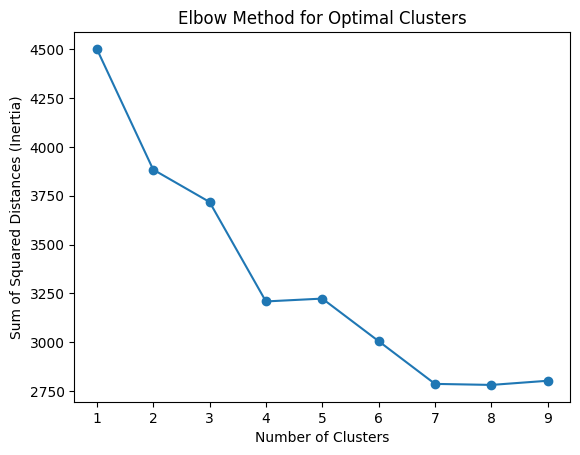

In [ ]:

!pip install scikit-learn-extra
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids

# Compute Hamming distance matrix
distance_matrix = pairwise_distances(df_encoded, metric='hamming')

# Try different cluster sizes
ssd = []
for k in range(1, 10):  # Test cluster numbers from 1 to 9
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmedoids.fit(distance_matrix)
    ssd.append(kmedoids.inertia_)

# Plot SSD vs. number of clusters
plt.plot(range(1, 10), ssd, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


Optimal Amount of Clusters is 6 Given elbow test
#Agglomerative Clustering Model

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# Compute the Hamming distance matrix
distance_matrix = pairwise_distances(df_encoded, metric='hamming')

# Apply Agglomerative Clustering with the precomputed distance matrix
clustering = AgglomerativeClustering(
    n_clusters=3, metric='precomputed', linkage='average'
)
labels = clustering.fit_predict(distance_matrix)

print("Cluster Labels:", set(labels))

Cluster Labels: {0, 1, 2}


#Clustering Performance & Evaluation

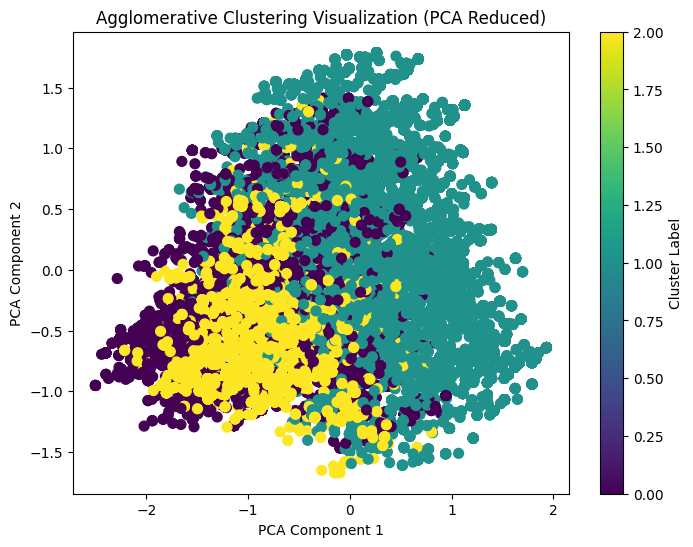

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_encoded)

# Scatter plot with clusters color-coded
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_encoded, clustering.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.11078756722635696


In [ ]:
def mode(x):
    return x.mode()[0]  # Return the first mode if multiple modes exist

# Add cluster labels to your original data
df['Cluster'] = clustering.labels_ # Changed df_encoded to df
#df_encoded['Cluster'] = clustering.labels_

# Calculate feature summaries for each cluster using the custom mode function
cluster_summary = df.groupby('Cluster').agg(['count', lambda x: mode(x)])

# Rename the lambda column to 'mode'
cluster_summary.columns = cluster_summary.columns.map(lambda x: x[0] if x[1] == '<lambda_0>' else '_'.join(x))

print(cluster_summary)

cluster_summary.to_csv('cluster_summary.csv')
df.to_csv('processedData.csv', index=False)

         isRecruiterOrBroker_0.0_count  isRecruiterOrBroker_0.0  \
Cluster                                                           
0                                 5740                      0.0   
1                                10235                      0.0   
2                                 2528                      0.0   

         isRecruiterOrBroker_1.0_count  isRecruiterOrBroker_1.0  \
Cluster                                                           
0                                 5740                      1.0   
1                                10235                      1.0   
2                                 2528                      0.0   

         isTransactionFacilitator_0.0_count  isTransactionFacilitator_0.0  \
Cluster                                                                     
0                                      5740                           0.0   
1                                     10235                           0.0   
2                   

# Random Forest Regression

In [ ]:
cluster_counts = np.bincount(labels)
cluster_risks = cluster_counts / cluster_counts.sum()
df_encoded['Cluster'] = clustering.labels_
df_encoded['Cluster_Risk_Score'] = [cluster_risks[label] for label in labels]

X = df_encoded.drop(['Cluster', 'Cluster_Risk_Score'], axis=1)
y = df_encoded['Cluster_Risk_Score']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Model Performance and Graphs

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred)
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
rmse = test_mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")



Train MSE: 0.00013962521852751457
Test MSE: 0.0010110407872825932
RMSE: 0.03179686757029052
R-squared (R2): 0.9586388665805246
Mean Absolute Error (MAE): 0.007696914802500587


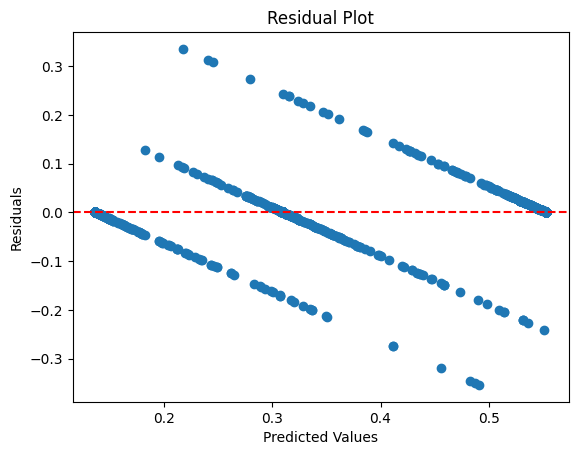

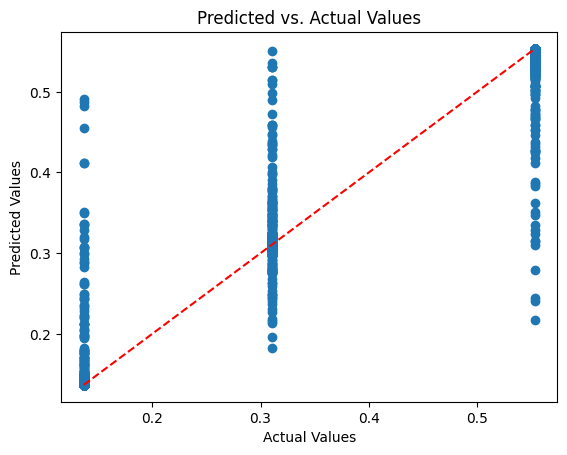

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

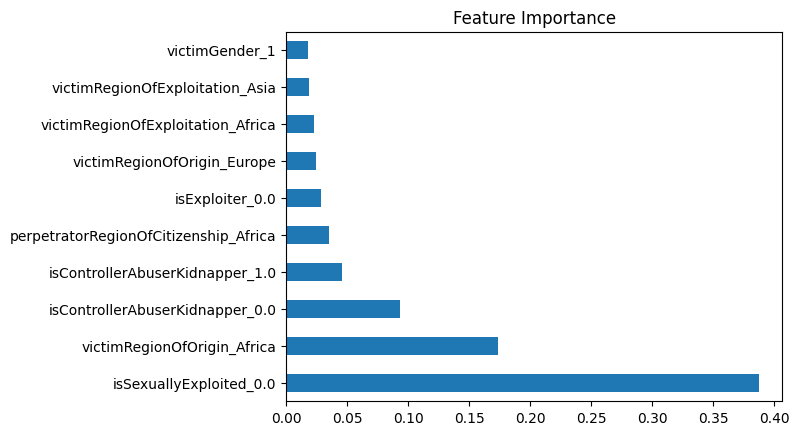

In [ ]:
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


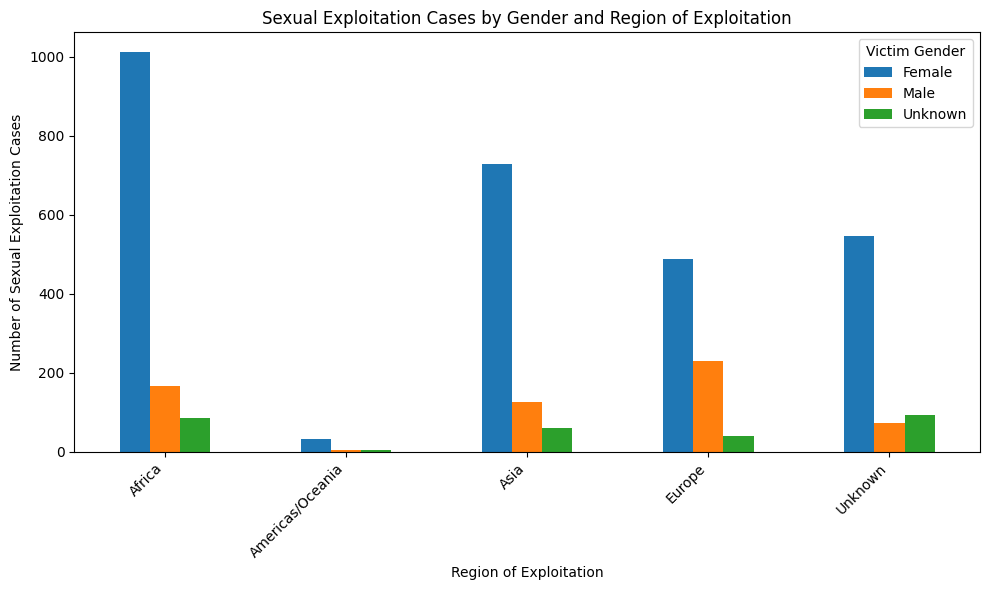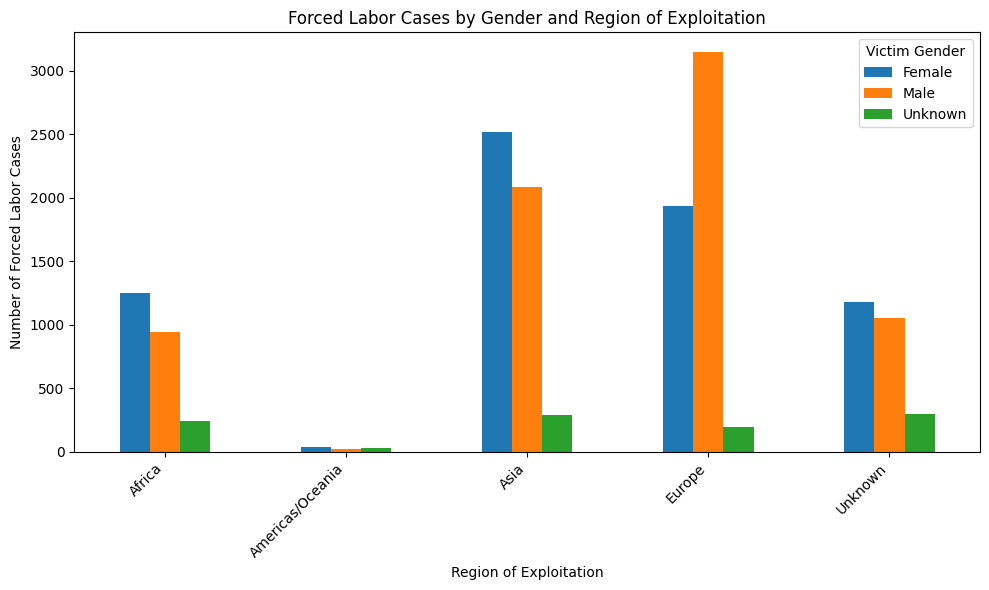

# Milestone 3

**Alternative Models**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradientModel = GradientBoostingRegressor()
gradientModel.fit(X_train, y_train)
y_pred = gradientModel.predict(X_test)

y_pred = gradientModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Gradient Boosting Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3, metric='manhattan', random_state=42)
labels = kmedoids.fit_predict(X)
silhouette_avg = silhouette_score(X, labels)
print("K-Medoids Metrics:")
print(f"Silhouette Score: {silhouette_avg}")

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

deepLearnModel = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
deepLearnModel.compile(optimizer='adam', loss='mse')
deepLearnModel.fit(X_train, y_train, epochs=50, batch_size=32)
y_pred = deepLearnModel.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Deep Learning Model Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")



Gradient Boosting Regressor Metrics:
Mean Squared Error (MSE): 0.004261986494436296
R-squared (R2): 0.8256444307235349
Mean Absolute Error (MAE): 0.03798734638133625


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


K-Medoids Metrics:
Silhouette Score: 0.05902949128885143
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0316
Epoch 2/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0043
Epoch 3/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034
Epoch 4/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0027
Epoch 5/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0024
Epoch 6/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020
Epoch 7/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 8/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017
Epoch 9/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0017
Epoch 10/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0015
Epoch 11/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0014
Epoch 12/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 13/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 14/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0013
Epoch 15/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0012


# SHAP & LIME Interpretation Techniques

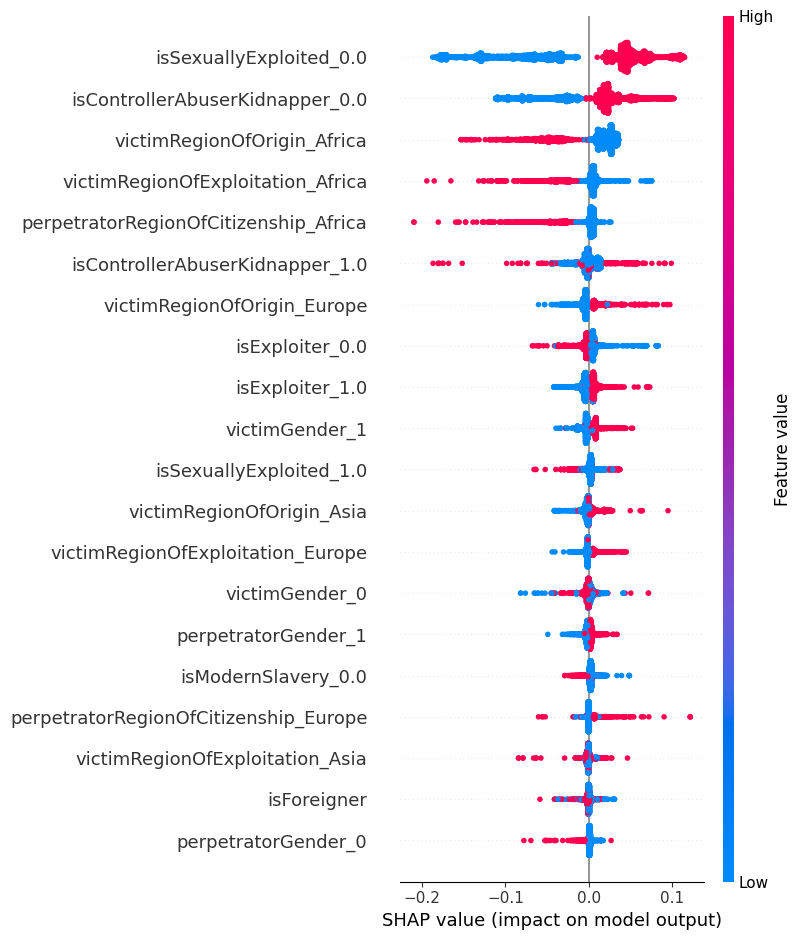

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
!pip install lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=X_train.columns, class_names=['isSexuallyExploited_0.0', 'isControllerAbuserKidnapper_0.0'], mode='regression'
)
exp = explainer.explain_instance(X_test.iloc[0], model.predict)
exp.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

# Project Report